In [1]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import math as m
from scipy.optimize import curve_fit
import pandas as pd
from sklearn.mixture import GaussianMixture
from scipy.stats import norm

In [2]:
def gaussiana(x,A,mu,sigma):
    return A*np.exp(-((x-mu)**2)/(2*sigma**2))

In [3]:
def par_gauss(Intervalo,df):
    inicio,fin=Intervalo[0],Intervalo[1]
    datos = df[(df["ADC"] >= inicio) & (df["ADC"] <= fin)]
    
    idx_max = datos["I0"].idxmax()
    mu_init = datos.loc[idx_max, "ADC"]
    A_init = datos.loc[idx_max, "I0"]
    sigma_init = (fin - inicio) / 4

    params, pcov= curve_fit(
            gaussiana,
            datos["ADC"].values,
            datos["I0"].values,
            p0=[A_init, mu_init, sigma_init],
            bounds=([0, inicio, 10], [np.inf, fin, fin-inicio])
    )
    return params,pcov, datos["ADC"].values,datos["I0"].values


In [82]:
# Lee el archivo ignorando múltiples espacios y tabs
df = pd.read_csv("EspectroxD_histo.txt",   sep='\t', header=None, names=["ADC","I0"])

# Convierte a arreglos de numpy o listas
ADC_espectro =df["ADC"].values
I_espectro=df["I0"].values
params,pcov,x,y= par_gauss((0.13e6,0.18e6),df)
params2,pcov2,x_661,y_661= par_gauss((0.685e6,0.73e6),df)

In [85]:
def chi2_reduced(obs, exp, n_params):
    mask = exp > 0
    chi2 = np.sum(((obs[mask] - exp[mask])**2) / exp[mask])
    dof = np.sum(mask) - n_params
    return chi2 / dof

chi2_pois = chi2_reduced(y,gaussiana(x,params[0],params[1],params[2]),n_params=2)
chi2_gaus = chi2_reduced(y_661,gaussiana(x_661,params2[0],params2[1],params2[2]),n_params=2)

print(f"χ² reducido (Poisson) = {chi2_pois:.2f}")
print(f"χ² reducido (Poisson) = {chi2_gaus:.2f}")

χ² reducido (Poisson) = 1.58
χ² reducido (Poisson) = 1.13


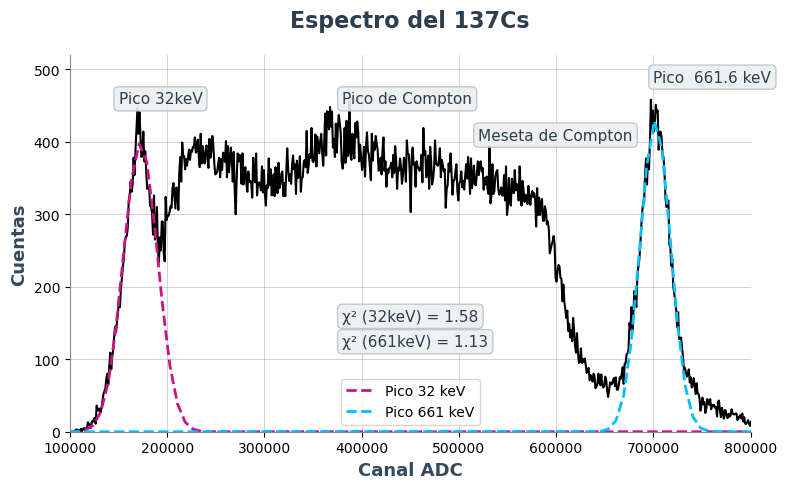

In [115]:
plt.figure(figsize=(8, 5))
plt.plot(ADC_espectro,I_espectro, color="black")
plt.xlim(0.1e6,0.8e6)
plt.ylim(0,520)
x2=np.linspace(0.1e6,8e6,1000)
ajuste1=gaussiana(x2,params[0],params[1],params[2])
ajuste2=gaussiana(x2,params2[0],params2[1],params2[2])

plt.plot(x2,ajuste1, '--', linewidth=2, color="mediumvioletred", label="Pico 32 keV")
plt.plot(x2,ajuste2, '--', linewidth=2, color="deepskyblue", label="Pico 661 keV")

    #Anotación LaTeX
ecuacion = r"Pico  661.6 keV"
plt.annotate(ecuacion, xy=(7e5, 483),
            fontsize=11, color="#2c3e50",
            bbox=dict(boxstyle="round,pad=0.3", facecolor="#ecf0f1", 
            edgecolor="#bdc3c7", alpha=0.9))


plt.annotate(r"Pico 32keV", xy=(1.5e5, 453),
            fontsize=11, color="#2c3e50",
            bbox=dict(boxstyle="round,pad=0.3", facecolor="#ecf0f1", 
            edgecolor="#bdc3c7", alpha=0.9))


plt.annotate(r"Meseta de Compton", xy=(5.2e5, 403),
            fontsize=11, color="#2c3e50",
            bbox=dict(boxstyle="round,pad=0.3", facecolor="#ecf0f1", 
            edgecolor="#bdc3c7", alpha=0.9))


plt.annotate(r"Pico de Compton", xy=(3.8e5, 453),
            fontsize=11, color="#2c3e50",
            bbox=dict(boxstyle="round,pad=0.3", facecolor="#ecf0f1", 
            edgecolor="#bdc3c7", alpha=0.9))

plt.annotate(r"χ² (32keV) = %.2f" %chi2_pois , xy=(3.8e5, 153),
            fontsize=11, color="#2c3e50",
            bbox=dict(boxstyle="round,pad=0.3", facecolor="#ecf0f1", 
            edgecolor="#bdc3c7", alpha=0.9))

plt.annotate(r"χ² (661keV) = %.2f" %chi2_gaus , xy=(3.8e5, 118),
            fontsize=11, color="#2c3e50",
            bbox=dict(boxstyle="round,pad=0.3", facecolor="#ecf0f1", 
            edgecolor="#bdc3c7", alpha=0.9))

  # Cuadrícula
plt.grid(True, alpha=0.8, linestyle='-', linewidth=0.5)

plt.xlabel('Canal ADC', fontsize=13, fontweight='bold', color="#34495e")
plt.ylabel('Cuentas', fontsize=13, fontweight='bold', color="#34495e")
plt.title("Espectro del 137Cs",fontsize=16, fontweight='bold', pad=20, color="#2c3e50")  

  # Ejes más limpios

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('#7f8c8d')
plt.gca().spines['bottom'].set_color('#7f8c8d')

plt.grid(axis='y', alpha=0.8)
plt.tight_layout()
plt.legend(loc="best")
plt.show()